<a href="https://colab.research.google.com/github/hugomilesi/E2E_customer_churn_analysis/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and model selection

In [ ]:
#hide
%%writefile kaggle.json
{"username":"hugoguilhermepenco","key":"6d955d2800ef8e713ffae7ac05c527b5"}

Writing kaggle.json


In [ ]:
#hide
!pip install -q -U kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=8ce2d3ca18318c764a6c714d2ef53c9cefcc72748127aeba1ce293425ccc203f
  Stored in directory: /root/.cache/pip/wheels/f3/16/ff/34e7d368370d4fd68bb749a59f1d2639ed66f3c14358e340a1
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.13
    Uninstalling kaggle-1.5.13:
      Successfully uninstalled kaggle-1.5.13


In [ ]:
# downloading the dataset
!kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 95.2MB/s]


In [ ]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# Information About the dataset

- CustomerID - customer ID.

- Gender - Whether the customer is a male or a female.

- SeniorCitizen - whether the customer is a senior citizen or not (1,0)

- Partner - whether the customer has a partner ot not (Yes, No)

- Dependents - Whether the customer has dependents or not(Yes, No).

- Tenure -  Number of months the customer has stayed with the company.

- PhoneService - whether the customer has a phone service or not (Yes, No)

- MultipleLines  - Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service).

- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service).

- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service) 

- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

- Contract - The contract term of the customer (Month-to-month, One year, Two year)

- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

- PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- MonthlyCharges - The amount charged to the customer monthly

- TotalCharges - The total amount charged to the customer

- Churn - Whether the customer churned or not (Yes or No)

---


# Data Mining and Model Selection

In [ ]:
# data analysis
%matplotlib inline
import pandas as pd, numpy as np, tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

# data normalization and preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# cross validation
from sklearn.model_selection import GridSearchCV


# model training
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

# model saving
import pickle


import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 60
pd.options.display.max_rows = 60


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing

In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# total charge is in string format and contain blank spaces. We need to convert to numeric and fill blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(r' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# checking for null values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- we got 11 rows containing null values for 'TotalCharges' column
- Since only 11 values are missing from a dataset of more than 7k rows, i will remove them.



In [ ]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)
df['TotalCharges'].isna().sum()

0

- SeniorCitizen is a categorical data but is in 'int64' format, let's convert it to object

In [ ]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

- Churn column contain values 'Yes' and 'No'.
- Since this dataset has a lot of categorical values containing "Yes" and "No", i will rename the values of the "Churn" column with the following: "**Yes**" to "**Churn_yes**" and "**No**" for "**Churn_no**". 

In [ ]:
df['Churn'].replace({'Yes': 'Churn_yes', 'No' : 'Churn_no'}, inplace = True)
df['Churn'].value_counts()

Churn_no     5163
Churn_yes    1869
Name: Churn, dtype: int64

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032,2,No,5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# it will be useless in the analysis
del df['customerID']

In [ ]:
# stores only categorical data
categorical = df.select_dtypes(include = ['object']).columns
categorical

# stores only quatitative data
quant = df.select_dtypes(include = ['float64', 'int64']).columns

print(f'This dataset contains {len(categorical)} categorical data and {len(quant)} quantitative data')
print(f'Categorical columns are: {list(categorical)} \n\nQuanticative columns are: {list(quant)} ')

This dataset contains 17 categorical data and 3 quantitative data
Categorical columns are: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Quanticative columns are: ['tenure', 'MonthlyCharges', 'TotalCharges'] 


# Exploratory Data Analysis(EDA)

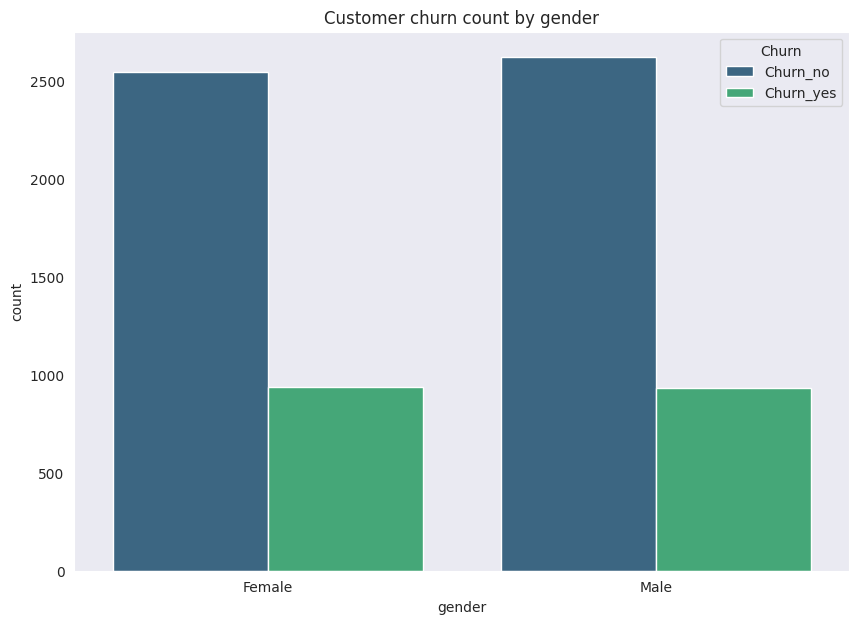

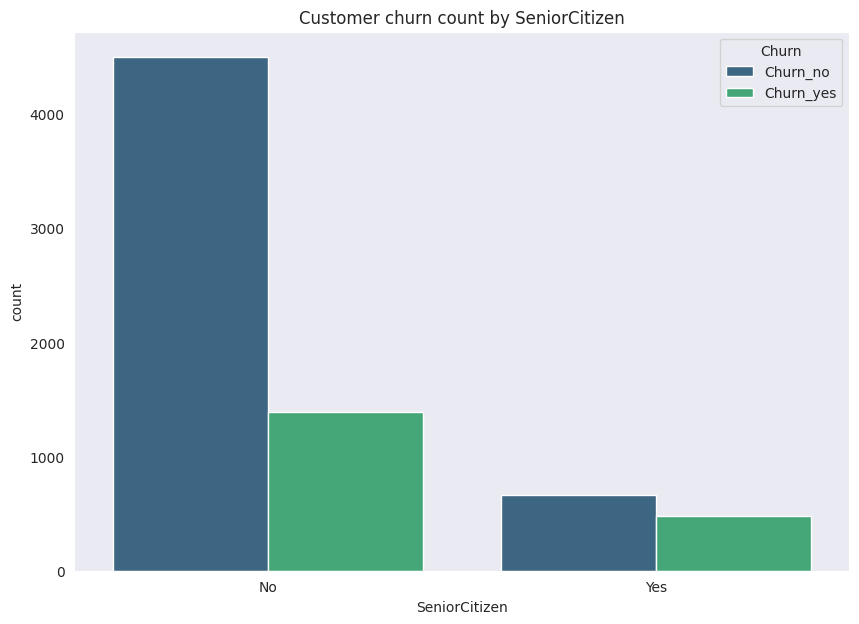

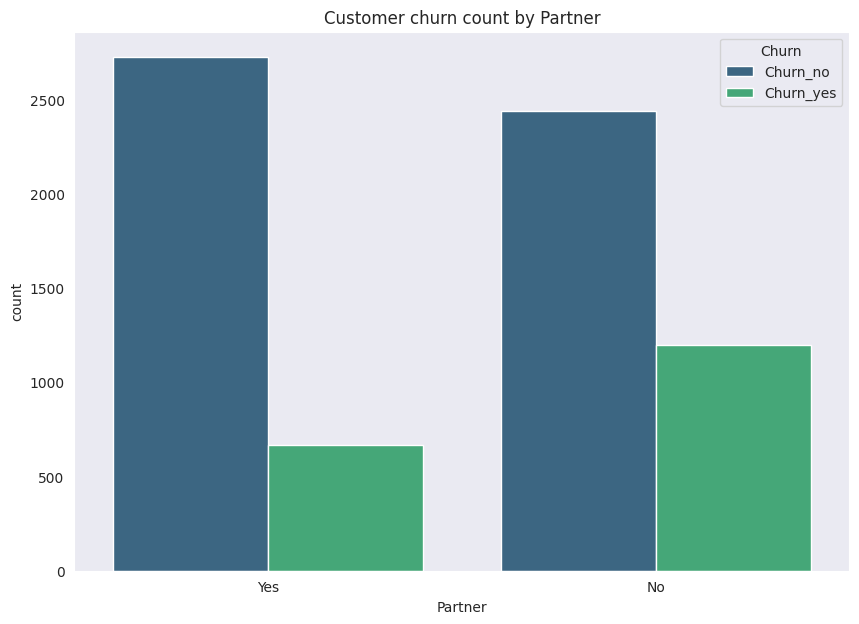

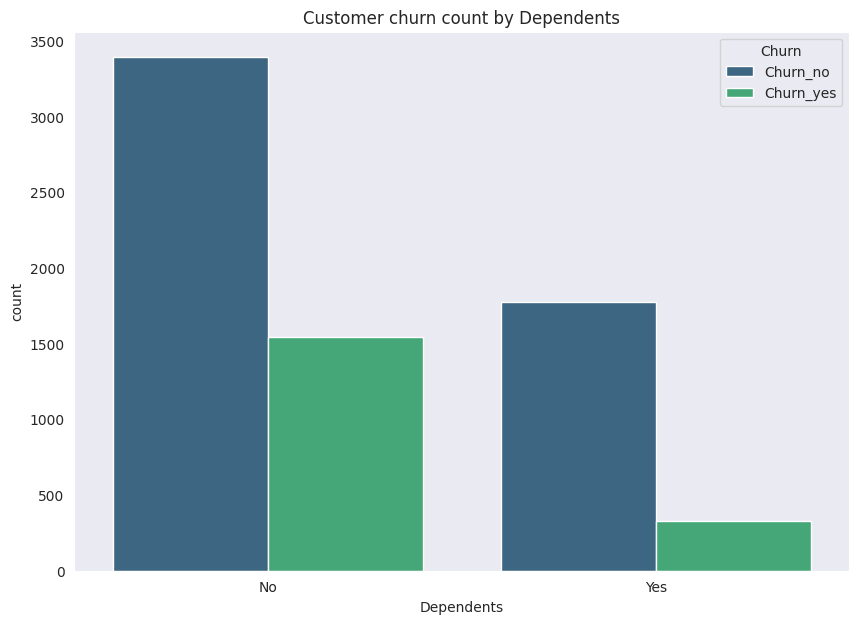

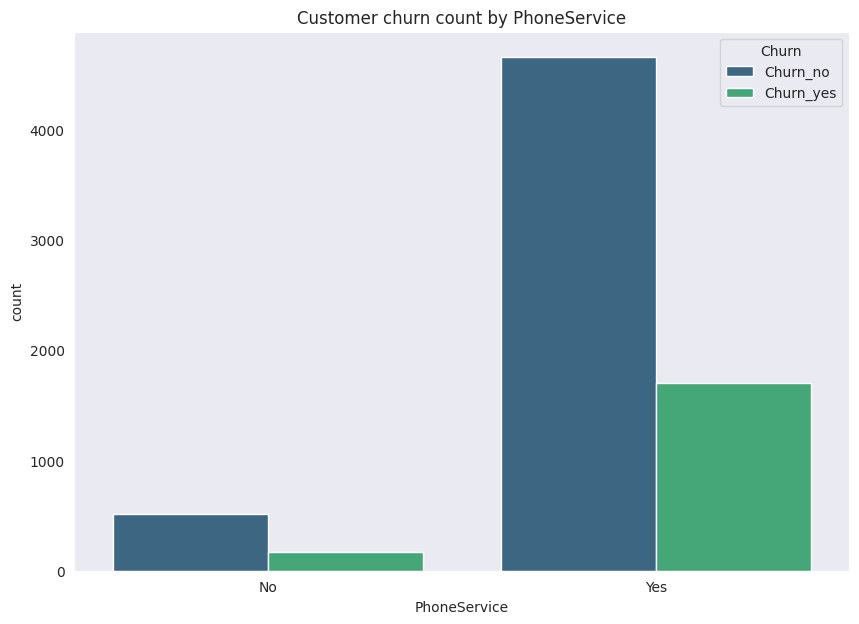

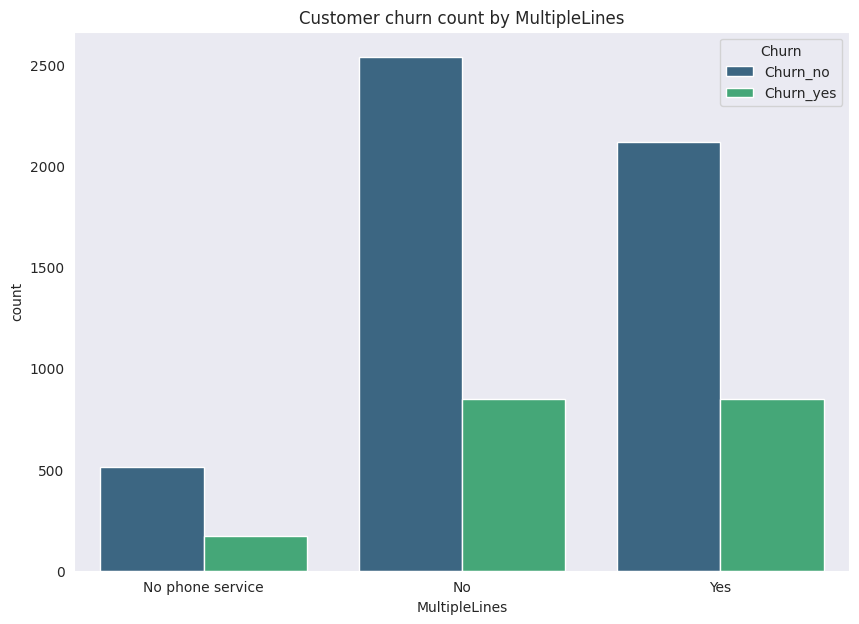

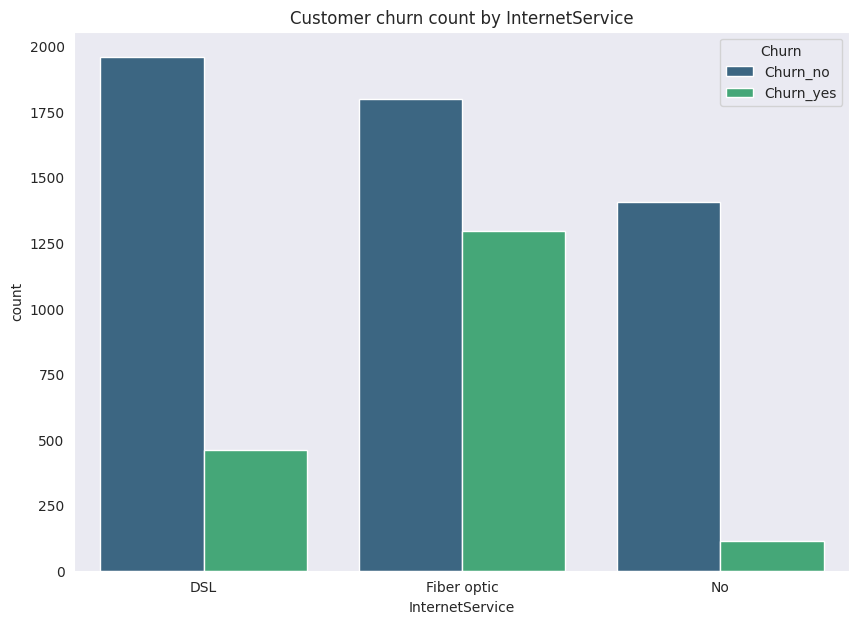

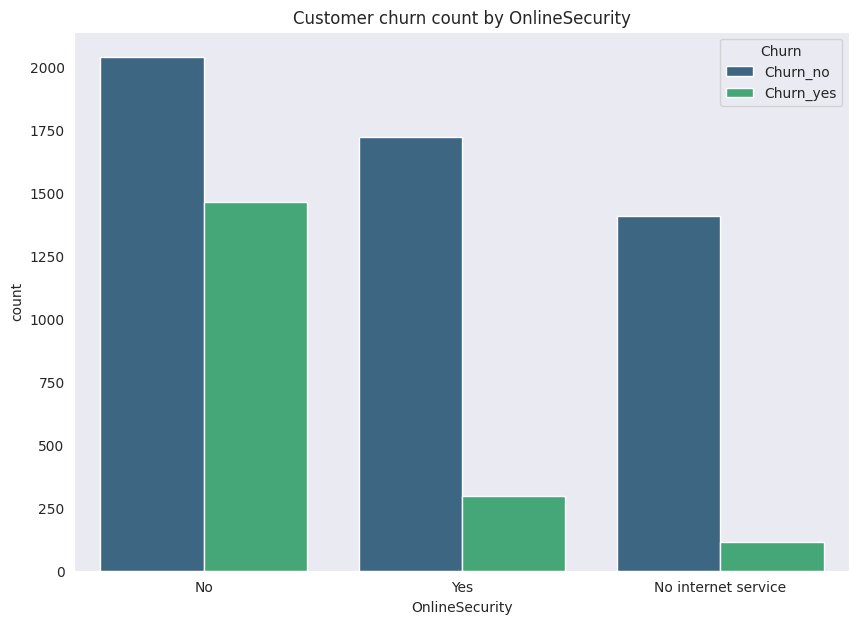

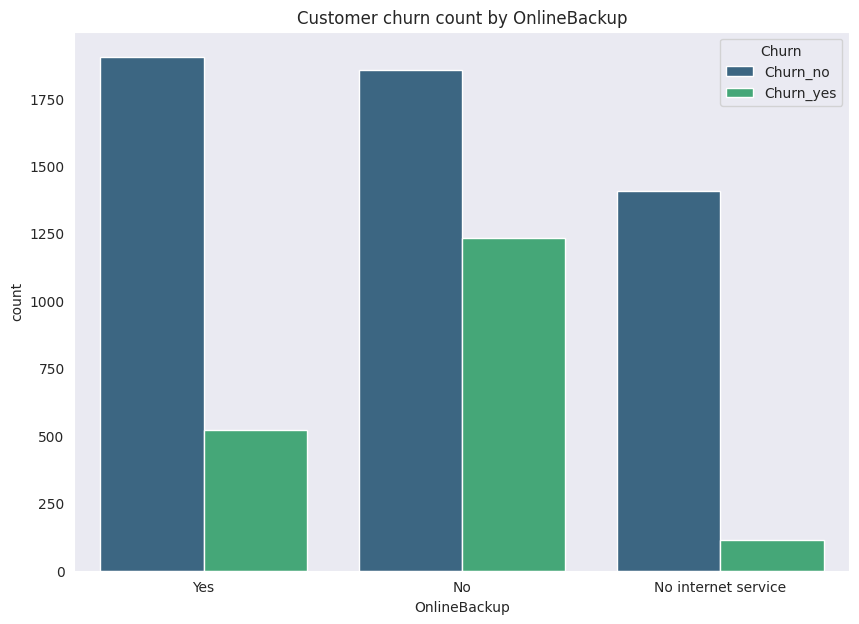

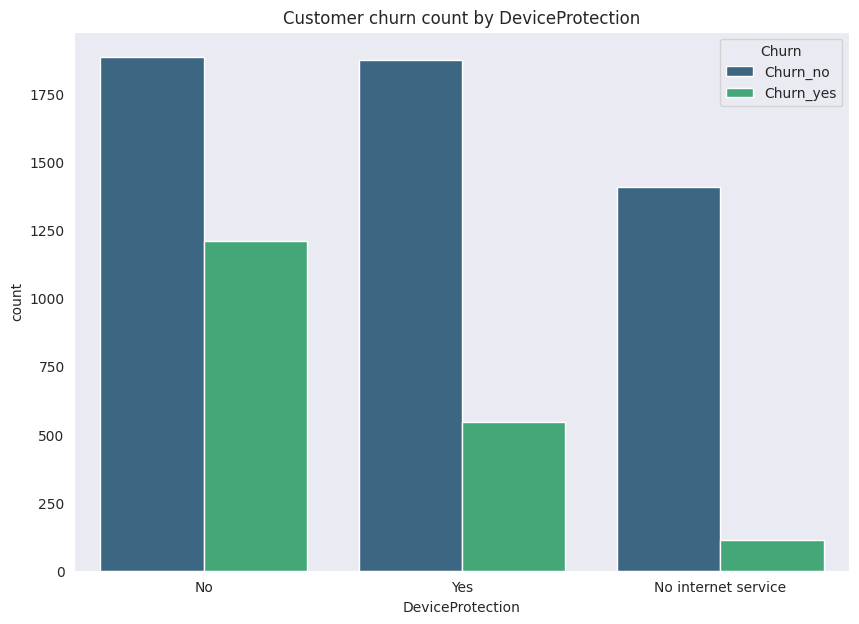

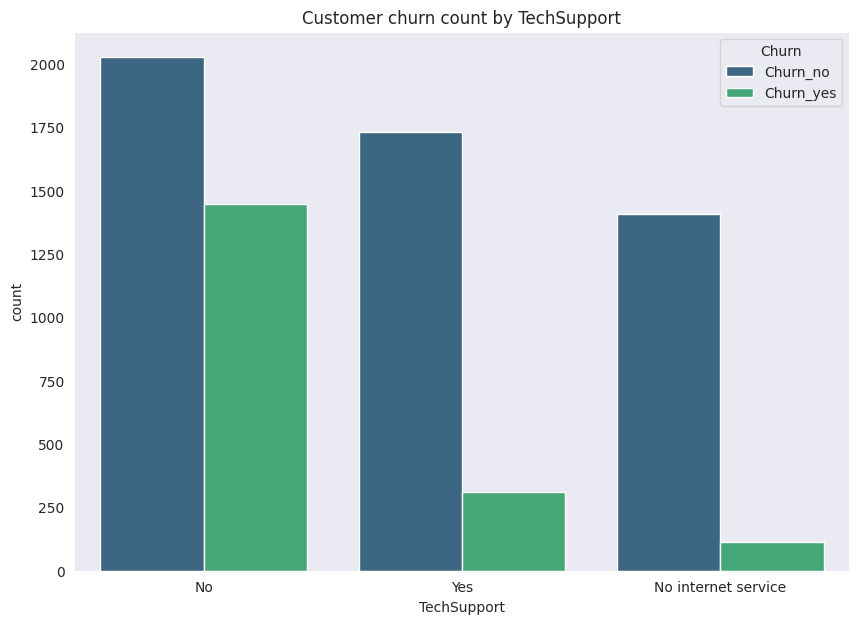

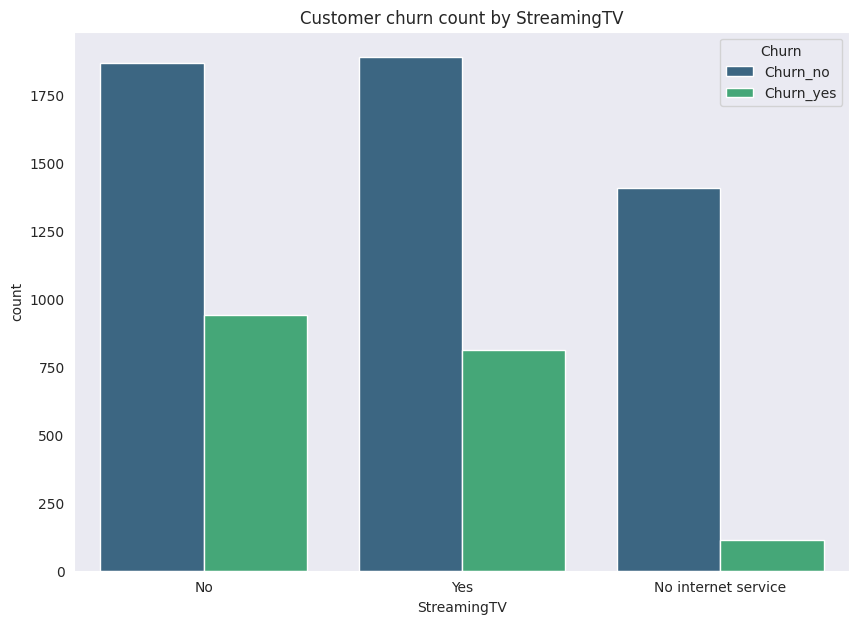

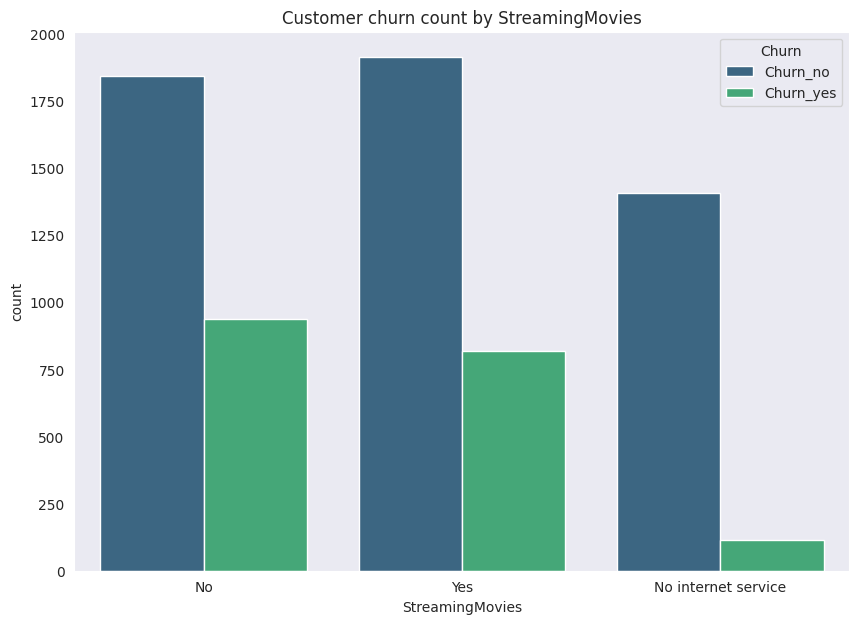

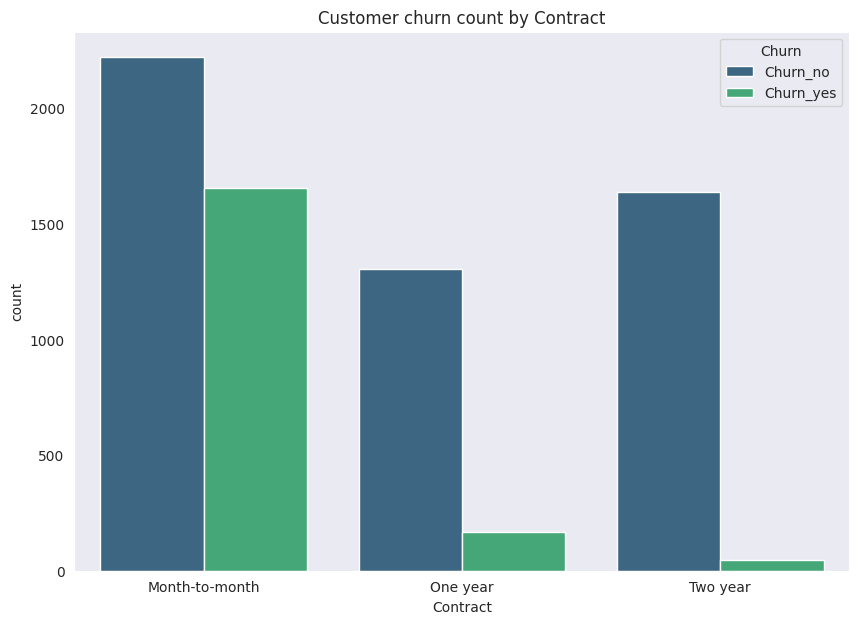

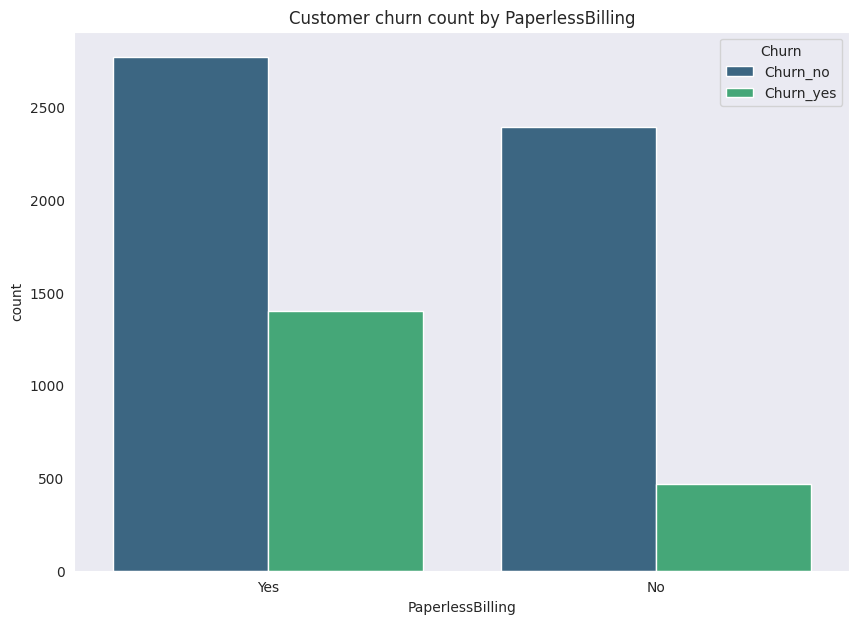

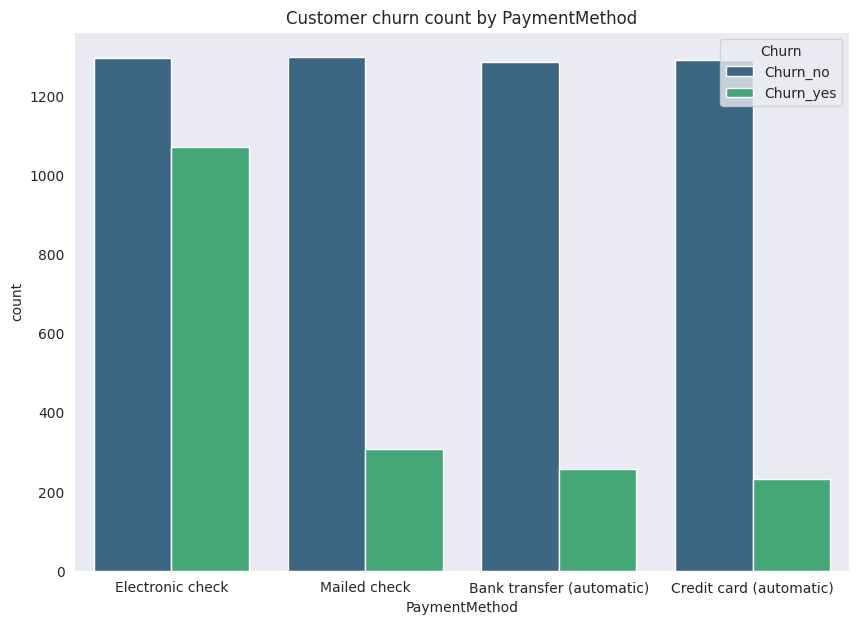

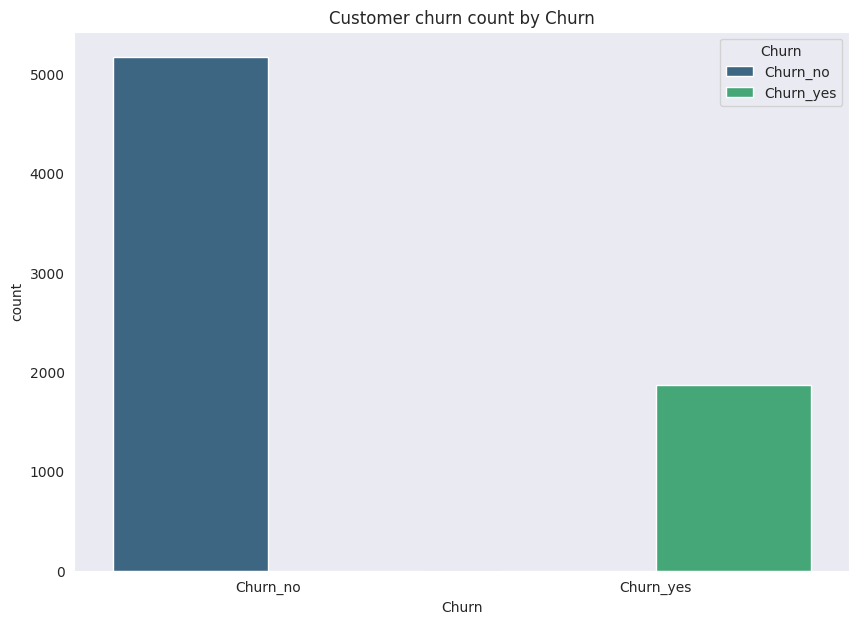

In [ ]:
for feat in categorical:
  plt.figure(figsize = (10, 7))
  sns.countplot(data = df, x = feat, hue = 'Churn', palette = 'viridis')
  plt.title(f'Customer churn count by {feat}')
  plt.show()
  print('')

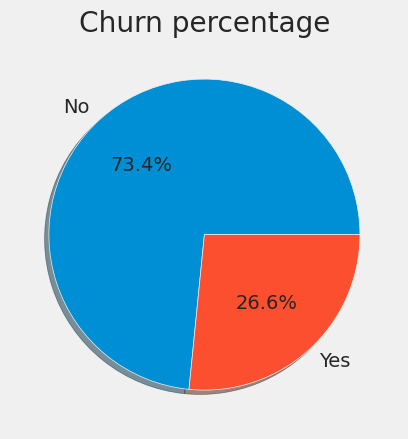

In [ ]:
plt.style.use("fivethirtyeight")
plt.pie(df['Churn'].value_counts(), labels = ['No', 'Yes'], autopct='%1.1f%%', shadow = True)
plt.title('Churn percentage')
plt.show()

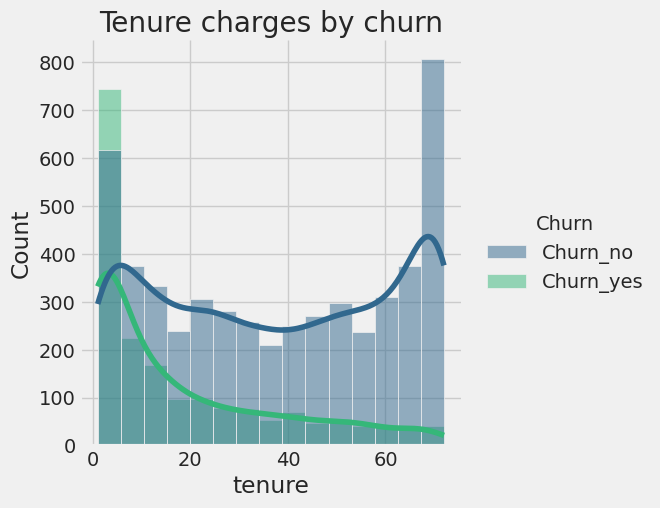

In [ ]:
sns.displot(data=df, x="tenure", hue="Churn", kde=True, palette = 'viridis')
plt.title('Tenure charges by churn')
plt.show()

## Conclusions:

### Significant data
- A high rate of customer churns are related to **Eletronic check** as payment method.
- High tenure time, lower churn rate.
- Churns are concetrated between an interval of 0 and 30 months. 
- Customers that have internet service with **Fiber optic** are more likely to churn.
- Customer without dependants churn more.
- Customers with a **month-to-month** contract type are more likely to churn.
- Customers with a higher monthly charge are more likely to churn.
- Customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts.
- **Non-senior citizens** churn more than **non-senior** in absolute term but in relative term **senior citizens** churn more often.

### Low significance data
- **Gender** has no influence on whether the customer will churn or not.
- **StreamingMovies, StreamingTV and MultipleLines** has very little influence in churns.

## About data distribution
- The average tenure of the customers is around 32 months, with a standard deviation of 24 months.
- The average monthly charge is 64.76, with a standard deviation of 30.09.
- Churn rate is around 27.0%.
- We have a non-symmetric bimodal distribution for customers that keep the internet plan as time passes and a right skewed distribution for customers that cancels the plan.
---

## Encoding

In [ ]:
mms = MinMaxScaler() # normalization


df['Churn'] = np.where(df['Churn'] == 'Churn_yes', 1, 0)

# splitting categorical columns from numeric for encoding
encoded = pd.get_dummies(df[categorical])
numeric = df[quant] # only numeric values

# normalizing numeric data
for num in quant:
  numeric[num] = mms.fit_transform(numeric[num].values.reshape(-1, 1))

# merging the encoded values with numerics again
all_data = pd.concat([encoded, numeric], axis = 1)

## Applying SMOTE

In [ ]:
churn_counts = df['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]
print(f'Rate between customers and churners is {churn_ratio}')

Rate between customers and churners is 2.7624398073836276


In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

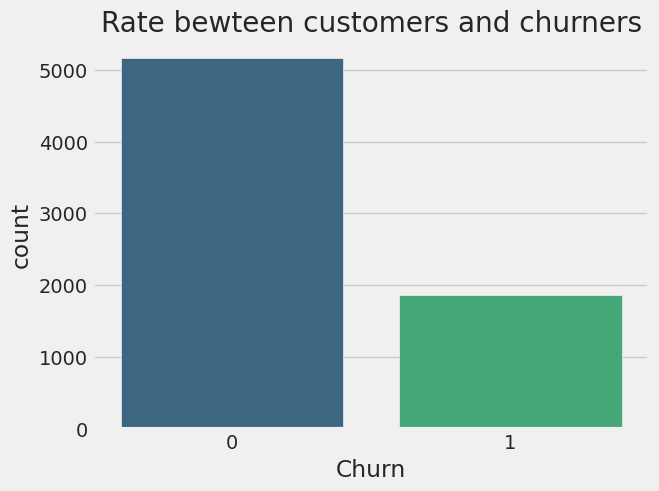

In [ ]:
sns.countplot(data = df, x = df['Churn'], palette = 'viridis')
plt.title('Rate bewteen customers and churners')
plt.show()

- Minor class is ~2.76 times smaller than the major class, we should consider oversampling the minor class (Churn yes).
- This problem is called Imbalance dataset. I'll be using **SMOTE technique** for trying to get better results.
- **SMOTE** means Synthetic Minority Over-sampling Technique.
- This technique adds synthetical examples to the minority class (churn yes) resulting in a balanced dataset.

In [ ]:
# samples
x = all_data.drop('Churn', axis = 1)

# target
y = all_data['Churn']

sm = SMOTE()

# oversampling
x_resampled, y_resampled = sm.fit_resample(x, y)

In [ ]:
# checking churners rate again
oversampled = pd.concat([y_resampled, x_resampled], axis = 1)

churn_counts = oversampled['Churn'].value_counts()
churn_ratio = churn_counts[0]/churn_counts[1]
print(f'rate between customers and churners is now: {churn_ratio}')

rate between customers and churners is now: 1.0


In [ ]:
oversampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

## Comparing Distributions

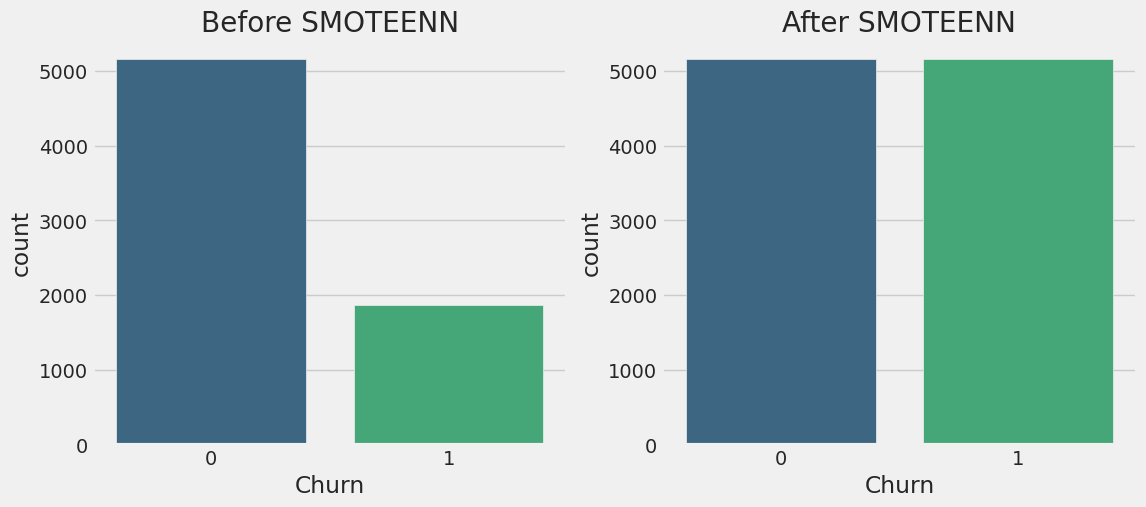

In [ ]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.countplot(data = df, x = 'Churn', palette = 'viridis')
plt.title("Before SMOTEENN")


plt.subplot(1, 2, 2) # index 2
sns.countplot(data = oversampled, x = 'Churn', palette = 'viridis')
plt.title("After SMOTEENN")

plt.show()

In [ ]:
# splitting oversampled data

x = oversampled.drop('Churn', axis = 1)
y = oversampled['Churn'].values

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [ ]:
print(x_train.shape, y_train.shape)

(8260, 46) (8260,)


# Model Evaluation

### Decision Tree

In [ ]:
# cross Validation
def get_best_model(estimator, params_grid = {}):
  model = GridSearchCV(estimator = estimator, param_grid = params_grid, cv = 3, scoring = 'accuracy', n_jobs = - 1)
  model.fit(x_train, y_train)
  print('\n--- Best Parameters-----------------------------')
  print(model.best_params_)
  print('\n--- Best Model---------------------------------')
  best_model = model.best_estimator_
  print(best_model)
  return best_model

In [ ]:
# model fit function
def model_fit(model, feature_imp = True, cv = 5):

  clf = model.fit(x_train, y_train)

  # prediction
  y_pred = clf.predict(x_test)

  print('\n--- Train Set -----------------------------')
  print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
  print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc'))))
  print('\n--- Validation Set -----------------------------')    
  print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
  print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc'))))
  print('-----------------------------------------------') 

  # reports
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, classes = class_names, title = 'Confusion Matrix')
  print(' ')

  # feature importance   
  if feature_imp:
      feat_imp = pd.Series(clf.feature_importances_,index=x_train.columns)
      feat_imp = feat_imp.nlargest(15).sort_values()
      plt.figure()
      plt.title("Most Important Features")
      feat_imp.plot(kind="barh")
      plt.show()




In [ ]:
# The confusion matrix plotting function is from the sklearn documentation below:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
class_names = ['Success','Failure']


### Random Forest


--- Best Parameters-----------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 500}

--- Best Model---------------------------------
RandomForestClassifier(max_depth=50, n_estimators=500, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.85145 +/- 0.0078
AUC: 0.92439 +/- 0.0059

--- Validation Set -----------------------------
Accuracy: 0.80300 +/- 0.0080
AUC: 0.87798 +/- 0.0127
-----------------------------------------------


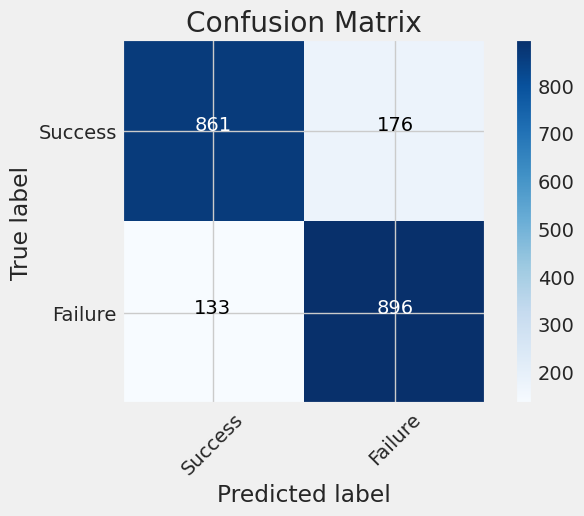

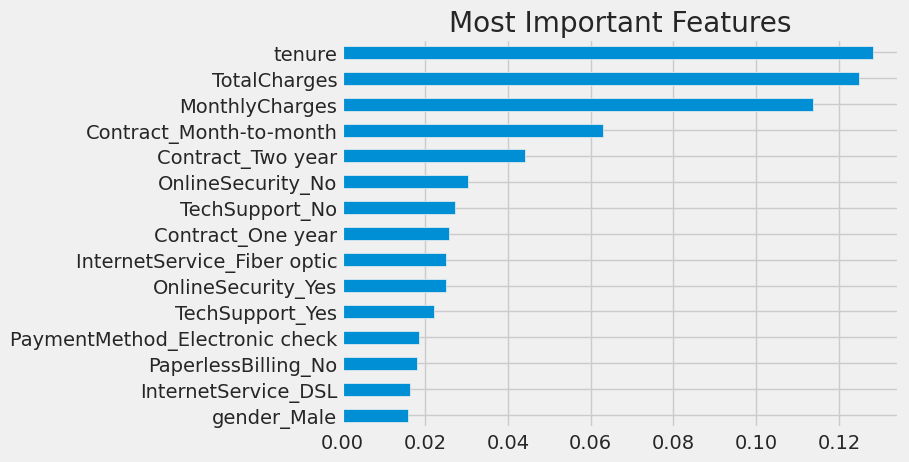

In [ ]:
classifier_rf = RandomForestClassifier(random_state = 3)
parameters = {
              'n_estimators': [100, 500, 1000],
              'max_depth':[10, 50, 100],
              'max_features': ['sqrt']
              }

clf_rf = get_best_model(classifier_rf, parameters)
model_fit(model = clf_rf, feature_imp = True)

### K-Nearest Neighbors KNN


--- Best Parameters-----------------------------
{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

--- Best Model---------------------------------
KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

--- Train Set -----------------------------
Accuracy: 0.81308 +/- 0.0116
AUC: 0.88650 +/- 0.0084

--- Validation Set -----------------------------
Accuracy: 0.76620 +/- 0.0148
AUC: 0.83638 +/- 0.0111
-----------------------------------------------


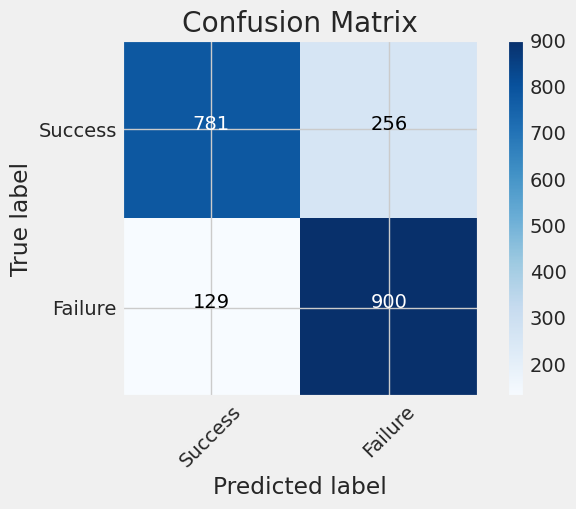

In [ ]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5,6,7],
              'p':[1,2],
              'weights':['uniform', 'distance']}

clf_knn = get_best_model(knn, parameters)
model_fit(model = clf_knn, feature_imp = False)

### Naive Bayes


--- Train Set -----------------------------
Accuracy: 0.75557 +/- 0.0136
AUC: 0.83339 +/- 0.0100

--- Validation Set -----------------------------
Accuracy: 0.75507 +/- 0.0183
AUC: 0.83114 +/- 0.0221
-----------------------------------------------


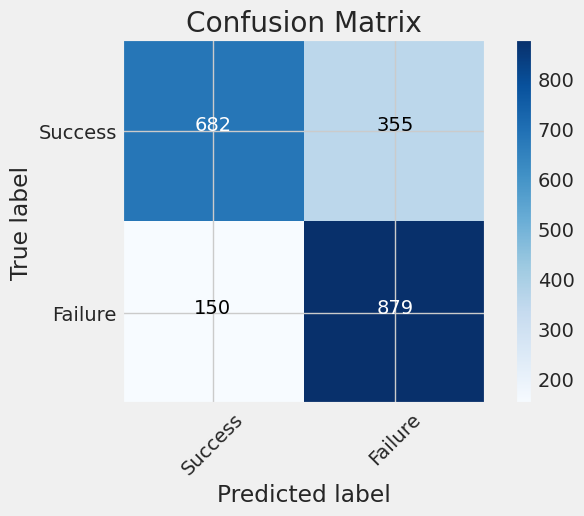

In [ ]:
clf_nb = GaussianNB()
model_fit(model = clf_nb, feature_imp = False)

### Logistic Regression


--- Best Parameters-----------------------------
{'penalty': 'l2'}

--- Best Model---------------------------------
LogisticRegression(random_state=3)

--- Train Set -----------------------------
Accuracy: 0.84649 +/- 0.0066
AUC: 0.93223 +/- 0.0038

--- Validation Set -----------------------------
Accuracy: 0.83493 +/- 0.0167
AUC: 0.91751 +/- 0.0133
-----------------------------------------------


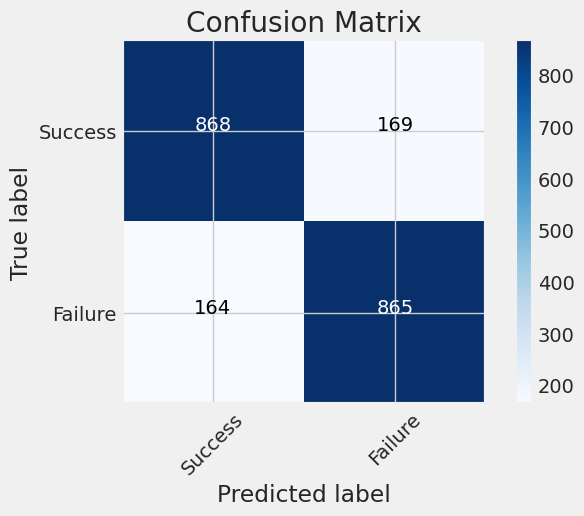

In [ ]:
lg = LogisticRegression(random_state=3)
parameters = { 
              'penalty':['l1','l2']}
clf_lg = get_best_model(lg,parameters)
model_fit(model=clf_lg, feature_imp=False)

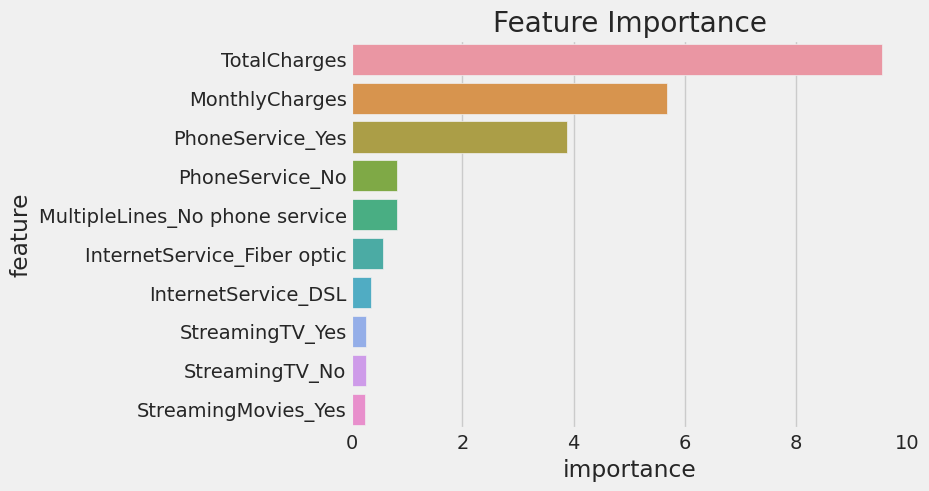

In [ ]:
import math

feature_importance = pd.DataFrame(x.columns.values, columns = ["feature"])
feature_importance["importance"] = pow(math.e, clf_lg.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
top10 = feature_importance[:10]

plt.title('Feature Importance')
sns.barplot(data = top10, x = 'importance', y = 'feature')
plt.show()

### XGBoost


--- Train Set -----------------------------
Accuracy: 0.84600 +/- 0.0070
AUC: 0.93046 +/- 0.0037

--- Validation Set -----------------------------
Accuracy: 0.81413 +/- 0.0111
AUC: 0.88491 +/- 0.0079
-----------------------------------------------


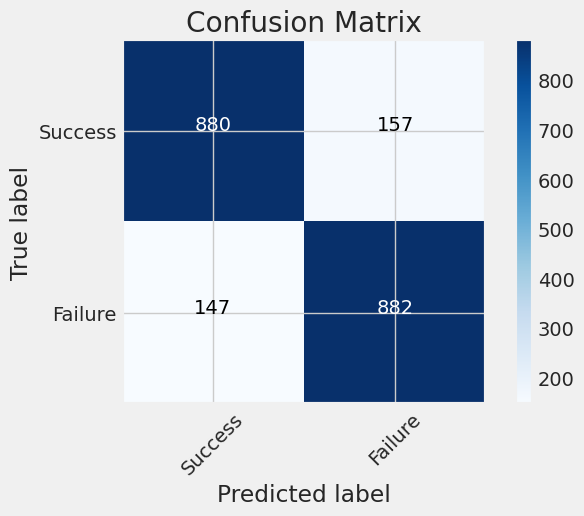

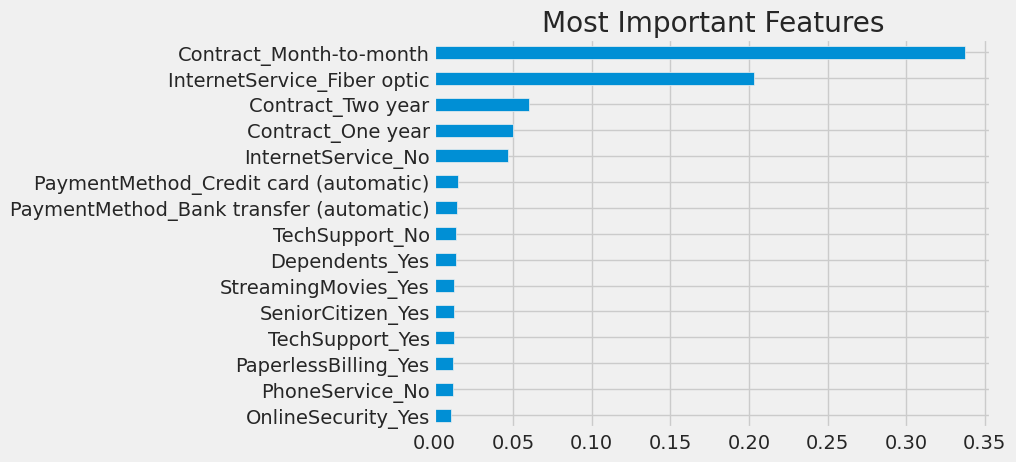

In [ ]:
clf_xgb = XGBClassifier()
model_fit(model = clf_xgb, feature_imp = True)

## AUC Curve

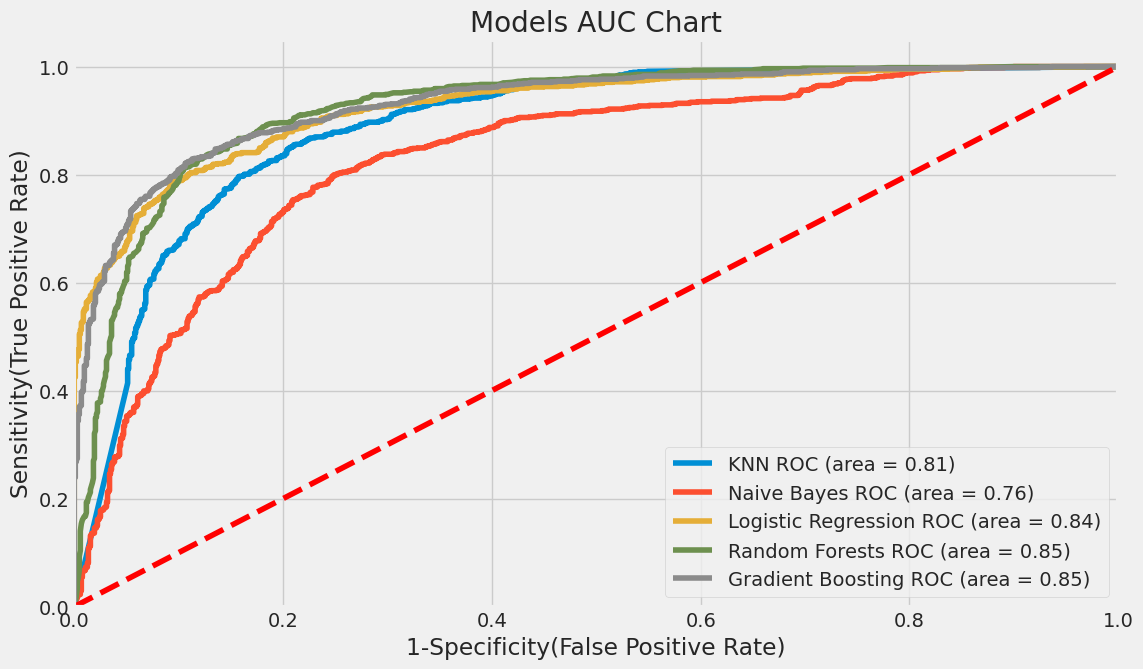

In [ ]:
plt.figure(figsize = (12, 7))
models = [
{
    'label': 'KNN',
    'model': clf_knn,
},
{
    'label': 'Naive Bayes',
    'model': clf_nb,
},
{
    'label': 'Logistic Regression',
    'model': clf_lg,
},
{
    'label': 'Random Forests',
    'model': clf_rf,
},
{
    'label': 'Gradient Boosting',
    'model': clf_xgb,
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Models AUC Chart')
plt.legend(loc="lower right")
plt.show()   # Display

# Model Selection

In [ ]:
# Compare model performance(KFold)
clfs= [clf_knn, clf_nb, clf_lg, clf_rf, clf_xgb]
index =['Random Forests', 'KNN', 'Naive Bayes', 'Logistic Regression', 'XG Boost']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)
models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

Naive Bayes            0.834934
XG Boost               0.814132
Logistic Regression    0.802997
Random Forests         0.766203
KNN                    0.755074
dtype: float64

### Selected Model
 - Naive Bayes got the highest accuracy, but predict a lot of **false positives** too, we should consider this.
 - Logistic regression and xgboost comes right after with little difference between them and better results in the confusion matrix and AUC curve than Naive Bayes.
 - I will choose **XGBoost** for this project, since it got a good accuracy and good metrics. 

## Model Saving

In [ ]:
filename = 'model.sav'

pickle.dump(clf_xgb, open(filename, 'wb'))

In [ ]:
print(x_train.shape, y_train.shape)

(8260, 46) (8260,)


In [ ]:
input_data = (x_test.values[0])

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1, -1)

prediction = clf_knn.predict(input_data_reshaped)

print(prediction)

if prediction[0] == 0:
  print('This customer have low chance of churning')
else:
  print('This customer have a high chance o churning.')


[1]
This customer have a high chance o churning.
